In [2]:
import matplotlib.pyplot as plt
import pesummary
from pesummary.io import read
print(pesummary.__version__)
import h5py
import numpy as np
import pandas as pd
import bilby
%matplotlib inline
%config InlineBackend.figure_format='retina'
pd.set_option('display.float_format', lambda x: '%.10f' % x)

path_json = "/home/licheng.yang/Deepclean_MDC/injection_set/injections_set_bilby.json"
path_csv = "/home/licheng.yang/Deepclean_MDC/injection_set/injections_set_bilby.csv"
injections = pd.read_csv(path_csv)

path_json_pycbc = "/home/licheng.yang/Deepclean_MDC/injection_set/injections_set_mix.json"
path_csv_pycbc = "/home/licheng.yang/Deepclean_MDC/injection_set/injections_set_mix.csv"
injections_pycbc = pd.read_csv(path_csv_pycbc)

path_active_segment_csv = "/home/licheng.yang/Deepclean_MDC/bilby_pipe/MDC_20_days/event_in_active_both.csv"
active_segment = pd.read_csv(path_active_segment_csv)
event_active_both = active_segment['0'].tolist()

sorted_snr_list_csv = "/home/licheng.yang/Deepclean_MDC/sorted_snr_list.csv"
sorted_snr_list = pd.read_csv(sorted_snr_list_csv)
sorted_snr_list = sorted_snr_list['injection_number'].tolist()

sorted_sum_snr_list_csv = "/home/licheng.yang/Deepclean_MDC/sorted_snr_list.csv"
sorted_sum_snr_list = pd.read_csv(sorted_sum_snr_list_csv)
sorted_sum_snr_list = sorted_sum_snr_list['injection_number'].tolist()

0.13.9


In [3]:
def chi_eff(spin_1z,spin_2z,mass_ratio):
    return spin_1z + spin_2z * mass_ratio /(1 + mass_ratio)

def chi_in_plane(spin_x,spin_y):
    return np.sqrt(spin_x ** 2 + spin_y ** 2)

def chi_p(spin_1x,spin_1y,spin_2x,spin_2y,mass_ratio):
    chi_1_in_plane = chi_in_plane(spin_1x,spin_1y)
    chi_2_in_plane = chi_in_plane(spin_2x,spin_2y)
    
    return np.maximum(chi_1_in_plane,(4 * mass_ratio + 3) / (3 * mass_ratio + 4) * mass_ratio * chi_2_in_plane)

In [4]:
injection_parameters = injections.iloc[50].to_dict()
injection_parameters_pycbc = injections_pycbc.iloc[50].to_dict()
truth = dict(mass_ratio=injection_parameters['mass_2']/injection_parameters['mass_1'],
             chirp_mass=bilby.gw.conversion.component_masses_to_chirp_mass(injection_parameters['mass_1'], injection_parameters['mass_2']),
             luminosity_distance=injection_parameters['luminosity_distance'],
             a_1=injection_parameters['a_1'],
             a_2=injection_parameters['a_2'],
             tilt_1=injection_parameters['tilt_1'],
             tilt_2=injection_parameters['tilt_2'],
             phi_12=injection_parameters['phi_12'],
             phi_jl=injection_parameters['phi_jl'],
             dec=injection_parameters['dec'],
             ra=injection_parameters['ra'],
             theta_jn=injection_parameters['theta_jn'],
             psi=injection_parameters['psi'],
             phase=injection_parameters['phase'],
             geocent_time=injection_parameters['geocent_time'],
             mass_1 = injection_parameters['mass_1'],
             mass_2 = injection_parameters['mass_2'],
             chi_eff = chi_eff(injection_parameters_pycbc['spin1z'],injection_parameters_pycbc['spin2z'],bilby.gw.conversion.component_masses_to_mass_ratio(injection_parameters['mass_1'],injection_parameters['mass_2'])),
             chi_p = chi_p(injection_parameters_pycbc['spin1x'],injection_parameters_pycbc['spin1y'],injection_parameters_pycbc['spin2x'],injection_parameters_pycbc['spin2y'],bilby.gw.conversion.component_masses_to_mass_ratio(injection_parameters['mass_1'],injection_parameters['mass_2'])),
             mass_1_source = injection_parameters['mass_1'] / (1 + bilby.gw.conversion.luminosity_distance_to_redshift(injection_parameters['luminosity_distance'])),
             mass_2_source = injection_parameters['mass_2'] / (1 + bilby.gw.conversion.luminosity_distance_to_redshift(injection_parameters['luminosity_distance'])),
             chirp_mass_source = bilby.gw.conversion.component_masses_to_chirp_mass(injection_parameters['mass_1'], injection_parameters['mass_2']) / (1 + bilby.gw.conversion.luminosity_distance_to_redshift(injection_parameters['luminosity_distance'])),
             redshift = bilby.gw.conversion.luminosity_distance_to_redshift(injection_parameters['luminosity_distance']))


In [5]:
file_name_org = 'ORG/injection_50/result/orginal_validation_60Hz_injection_50_data0_1251334728-7168145_analysis_H1L1_result.json'
file_name_dc = 'DC/injection_50/result/deepclean_validation_60Hz_injection_50_data0_1251334728-7168145_analysis_H1L1_result.json'
# file_name_dc_train_on_inj = 'DC_train_on_inj/injection_50/result/deepclean_validation_60Hz_injection_50_data0_1251334728-7168145_analysis_H1L1_result.json'
# file_name_dc_online = 'DC/injection_50/result/deepclean_validation_60Hz_injection_50_data0_1251334728-7168145_analysis_H1L1_result.json'

In [6]:
# Using pesummary
data_org = read(file_name_org, package="core")
data_dc = read(file_name_dc, package="core")
# data_dc_train_on_inj = read(file_name_dc_train_on_inj, package="core")
# data_dc_online = read(file_name_dc_online, package="core")

In [7]:
type(data_org)

pesummary.core.file.formats.bilby.Bilby

In [8]:
samples_dict = {}
samples_dict["original"] = {}
samples_dict["deepclean"] = {}
# samples_dict["deepclean train on inj"] = {}
# samples_dict["deepclean online"] = {}

In [9]:
from pesummary.utils.samples_dict import MultiAnalysisSamplesDict
samples_dict = MultiAnalysisSamplesDict(samples_dict)

In [10]:
samples_dict["original"] = data_org.samples_dict
samples_dict["deepclean"] = data_dc.samples_dict
# samples_dict["deepclean train on inj"] = data_dc_train_on_inj.samples_dict
# samples_dict["deepclean online"] = data_dc_online.samples_dict

posterior_samples_org = samples_dict["original"]
posterior_samples_dc = samples_dict["deepclean"]
# posterior_samples_dc_train_on_inj = samples_dict["deepclean train on inj"]
# posterior_samples_dc_online = samples_dict["deepclean online"]

parameters = sorted(list(posterior_samples_org.keys()))
print(parameters)

['H1_optimal_snr', 'L1_optimal_snr', 'a_1', 'a_2', 'chi_1_in_plane', 'chi_2_in_plane', 'chi_eff', 'chi_p', 'chirp_mass', 'chirp_mass_source', 'comoving_distance', 'cos_tilt_1', 'cos_tilt_2', 'dec', 'geocent_time', 'iota', 'log_likelihood', 'log_prior', 'luminosity_distance', 'mass_1', 'mass_1_source', 'mass_2', 'mass_2_source', 'mass_ratio', 'minimum_frequency', 'phase', 'phi_1', 'phi_12', 'phi_2', 'phi_jl', 'psi', 'ra', 'recalib_H1_amplitude_0', 'recalib_H1_amplitude_1', 'recalib_H1_amplitude_2', 'recalib_H1_amplitude_3', 'recalib_H1_amplitude_4', 'recalib_H1_amplitude_5', 'recalib_H1_amplitude_6', 'recalib_H1_amplitude_7', 'recalib_H1_amplitude_8', 'recalib_H1_amplitude_9', 'recalib_H1_frequency_0', 'recalib_H1_frequency_1', 'recalib_H1_frequency_2', 'recalib_H1_frequency_3', 'recalib_H1_frequency_4', 'recalib_H1_frequency_5', 'recalib_H1_frequency_6', 'recalib_H1_frequency_7', 'recalib_H1_frequency_8', 'recalib_H1_frequency_9', 'recalib_H1_phase_0', 'recalib_H1_phase_1', 'recalib_H1

In [11]:
type(samples_dict)

pesummary.utils.samples_dict.MultiAnalysisSamplesDict

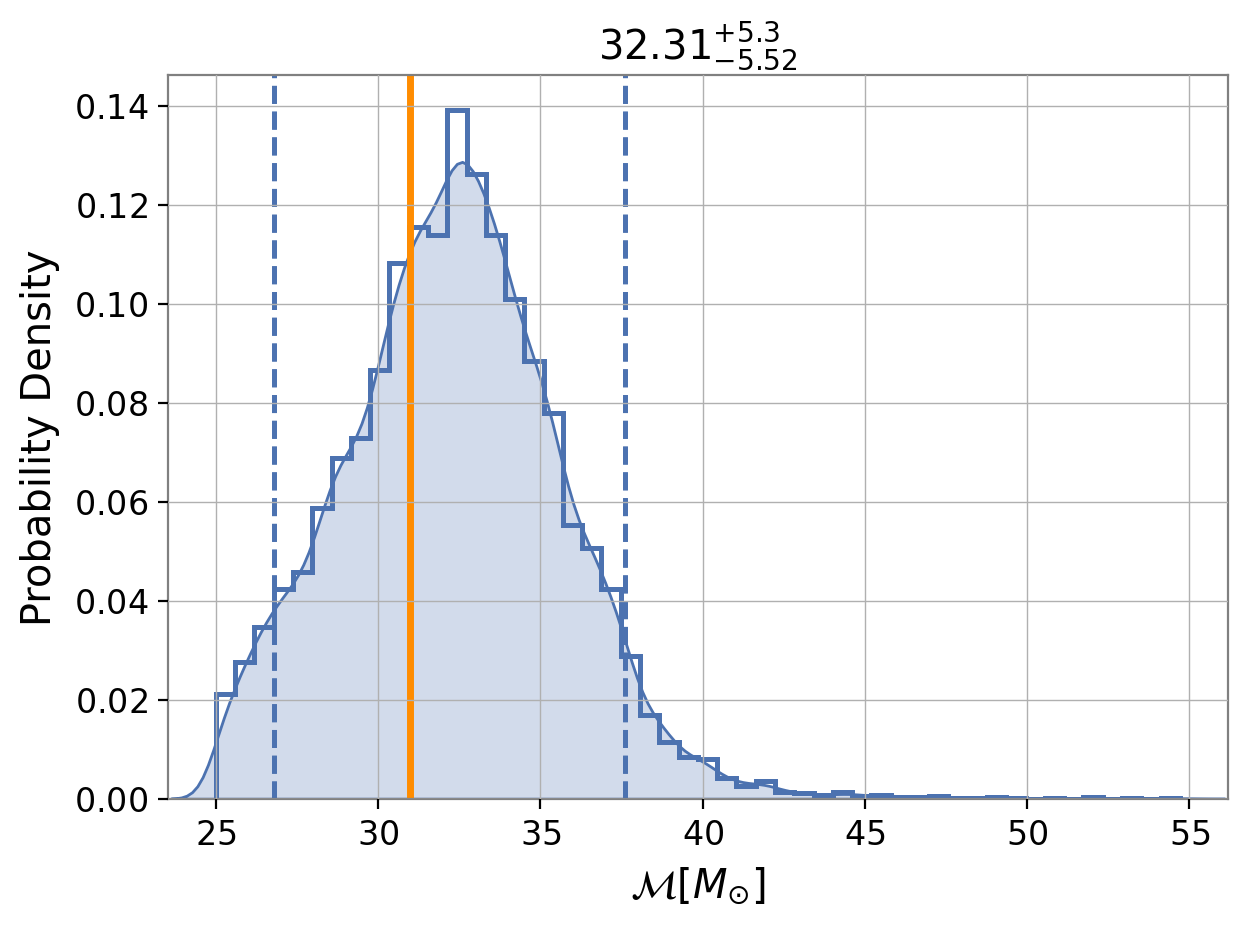

In [12]:
fig = posterior_samples_org.plot('chirp_mass', type='hist')
_ = posterior_samples_org.plot('chirp_mass', type='hist',fig=fig, kde=True, inj_value = truth["chirp_mass"],injection_color = "#FF8C00")
# plt.axvline( 
#     truth["chirp_mass"],
#     color='#FF8C00',
#     linewidth=3
#     ) 
# plt.show()
plt.show()

In [13]:
# Set a consistent color scheme
cp = ['#1b9e77','#d95f02']
# cp = ['#1b9e77','#d95f02','#7570b3','C0']

In [14]:
# labels_of_interest = ['original','deepclean','deepclean train on inj','deepclean online']
labels_of_interest = ['original','deepclean']
fig = samples_dict.plot('chirp_mass', type='hist', kde=True,labels=labels_of_interest,colors=cp,inj_value = truth["chirp_mass"],injection_color = "#FF8C00")
# x = np.linspace(0, 2, 30)
# plt.axvline(
#     truth["chirp_mass"], 
#     color='#FF8C00',
#     linewidth=3
#     ) 
# plt.show()
# plt.savefig("chirp_mass_hist.png")

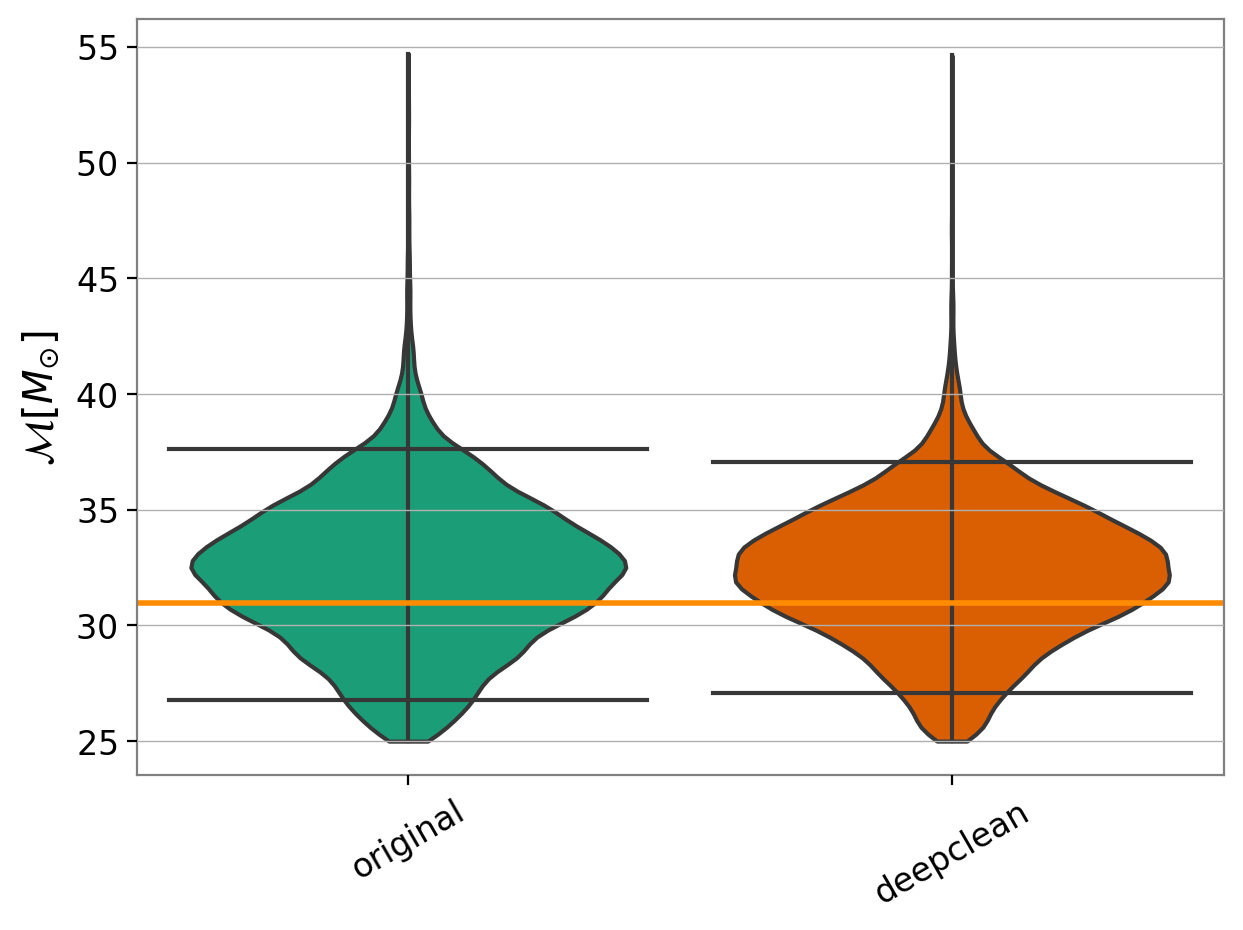

In [15]:
fig = samples_dict.plot('chirp_mass', type='violin',labels=labels_of_interest,palette=cp,inj_value = truth["chirp_mass"])
plt.axhline( 
    truth["chirp_mass"], 
    color='#FF8C00',
    linewidth=2
    ) 
plt.savefig("violin.png")

In [ ]:
fig, ax1, ax2, ax4 = samples_dict.plot(['mass_ratio', 'chirp_mass'], type='reverse_triangle',
                        grid=False,labels=labels_of_interest,colors=cp,inj_value = [truth["mass_ratio"],truth["chirp_mass"]],injection_color = "#FF8C00")
ax1.axhline( 
    truth["chirp_mass"], 
    color='#FF8C00',
    linewidth=2
    ) 
ax2.axvline(
    truth["mass_ratio"],
    color='#FF8C00', 
    linewidth=2
    ) 
ax2.axhline(
    truth["chirp_mass"],
    color='#FF8C00',
    linewidth=2
    ) 
ax4.axvline(
    truth["mass_ratio"],
    color='#FF8C00',
    linewidth=2
    ) 
plt.show()
# plt.savefig("reverse_triangle.png")

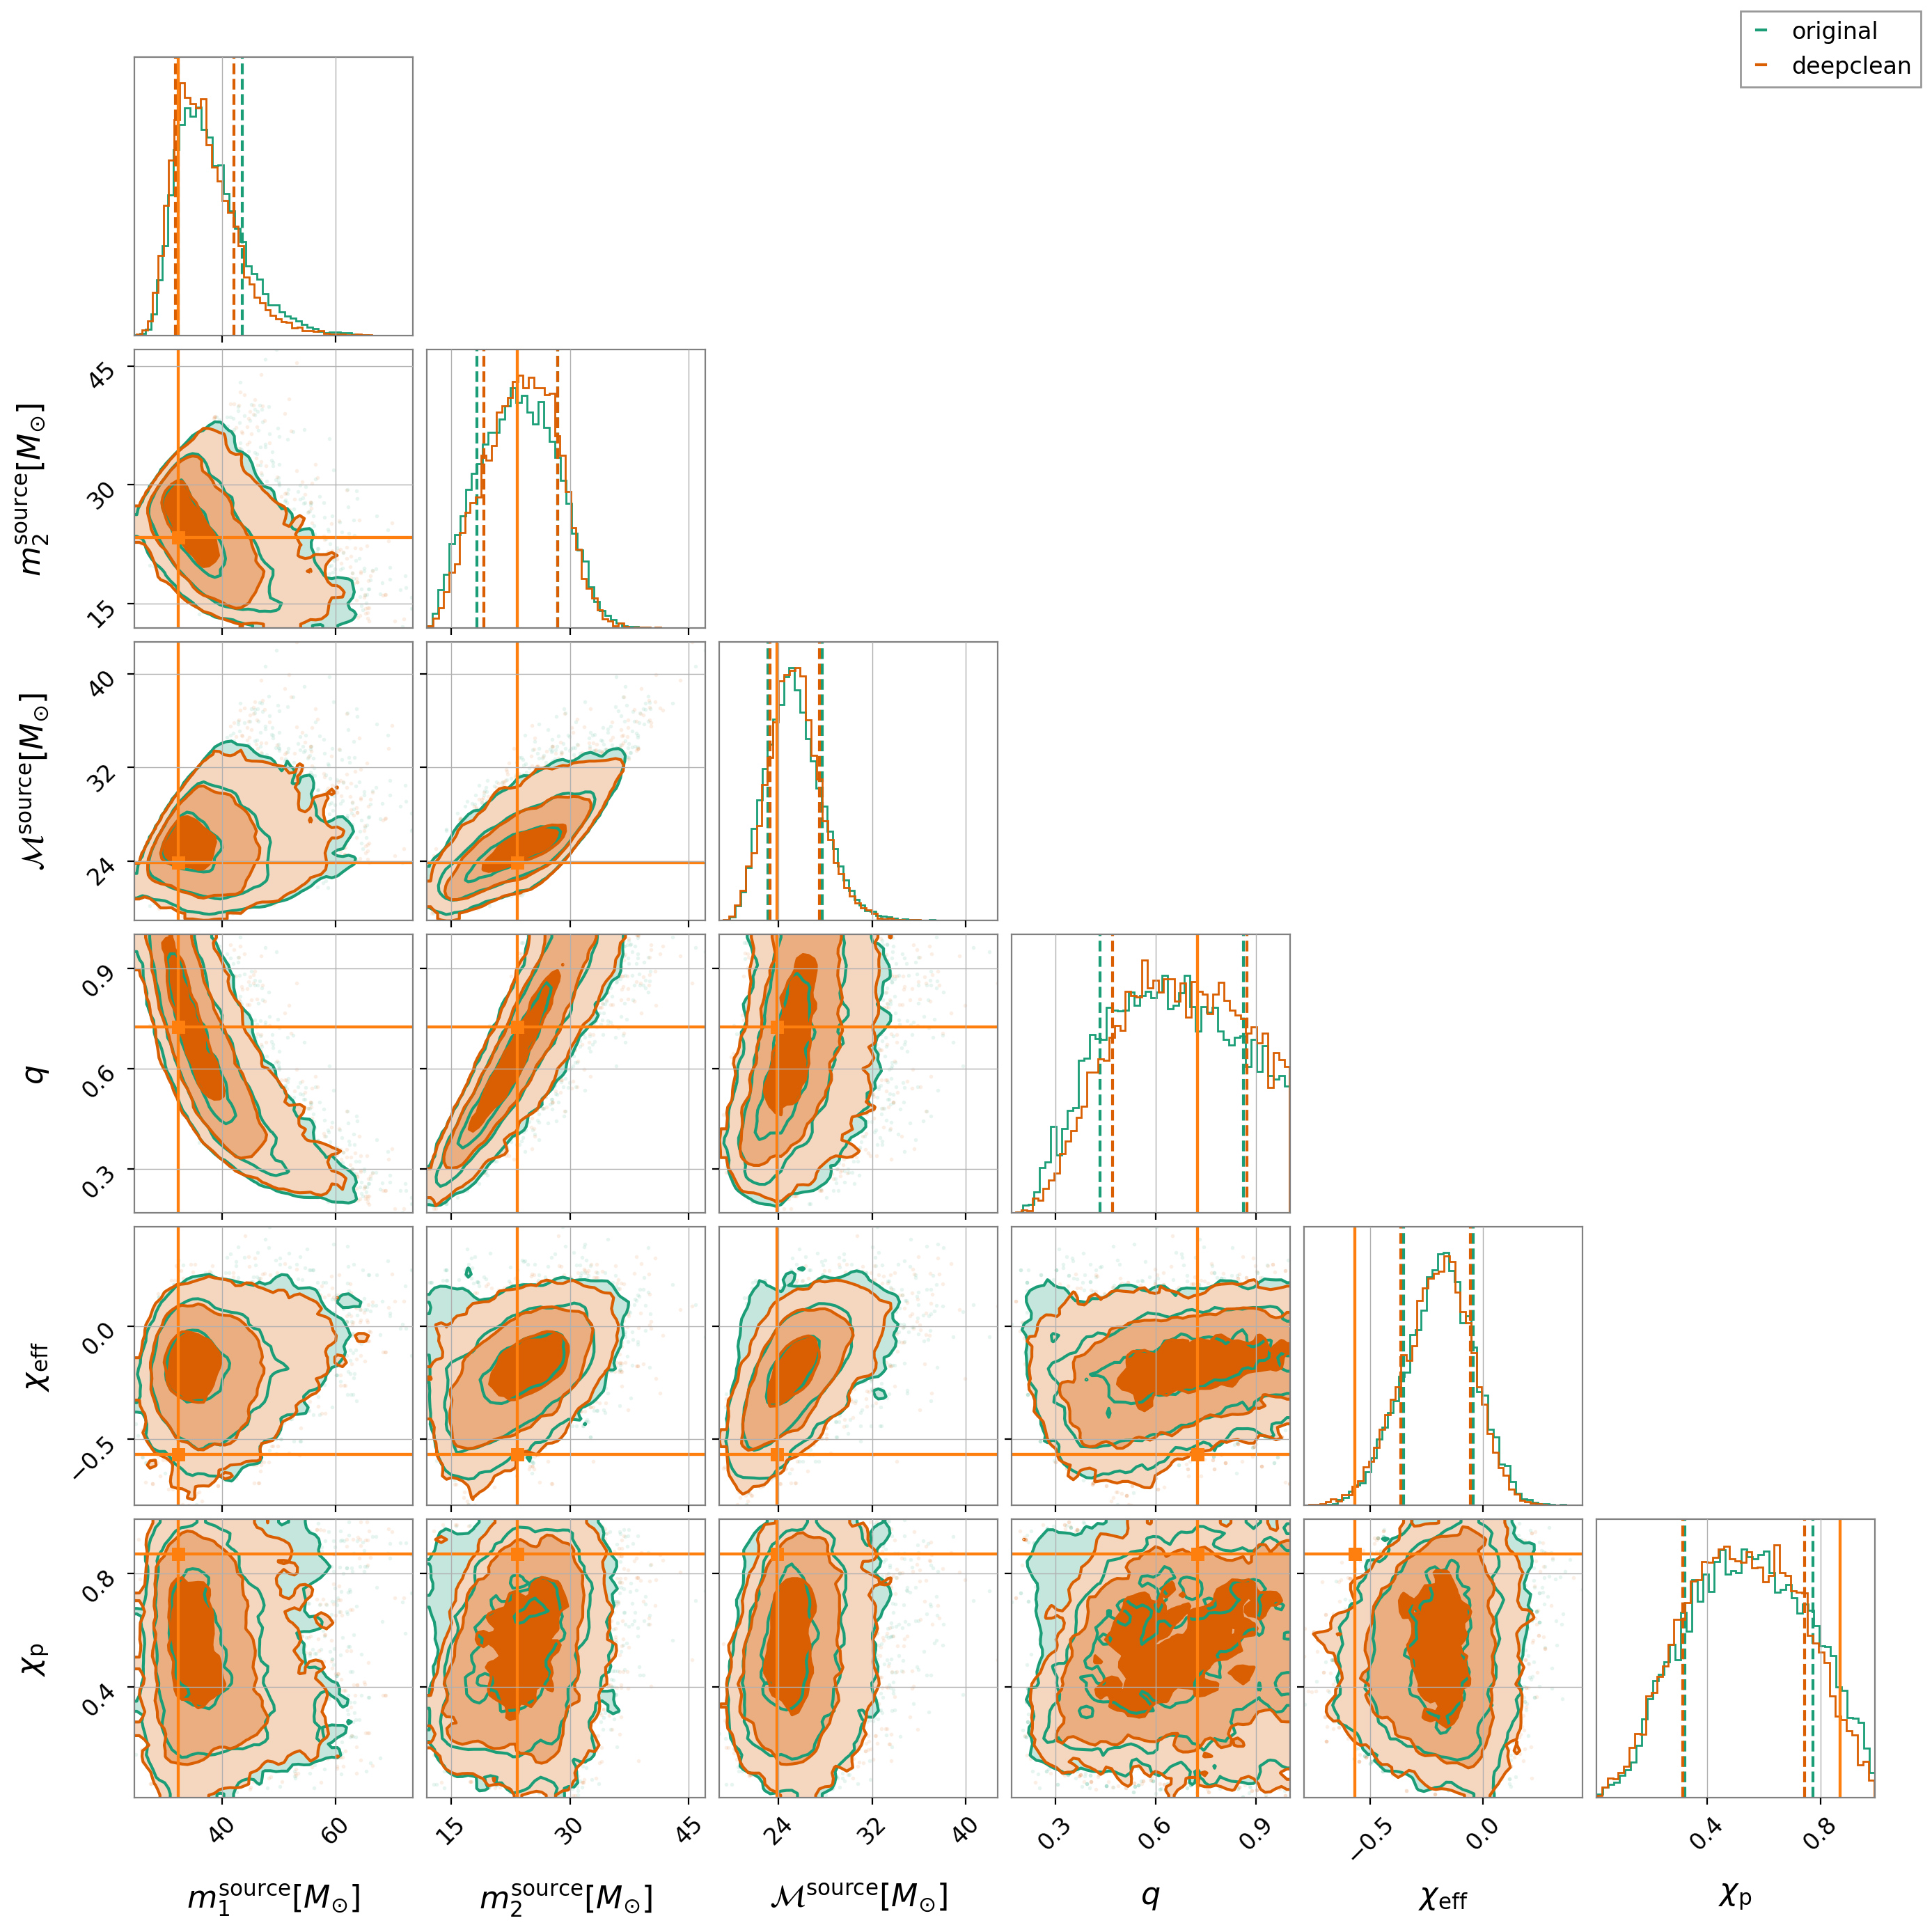

In [16]:
keys = ['mass_1_source', 'mass_2_source', 'chirp_mass_source', 'mass_ratio', 'chi_eff', 'chi_p']
truths = [truth['mass_1_source'],
          truth['mass_2_source'],
          truth['chirp_mass_source'],
          truth['mass_ratio'],
          truth['chi_eff'],
          truth['chi_p']]
fig = samples_dict.plot(type='corner', 
                        parameters=keys,title_kwargs=dict(fontsize=16),
                       labels=labels_of_interest,colors=cp,truths=truths,quantiles=[0.16, 0.84],plot_datapoints=True, fill_contours=True,max_n_ticks=3, hist_kwargs=dict(density=True)
                       )
plt.savefig("corner_plot_intrinsic.png")

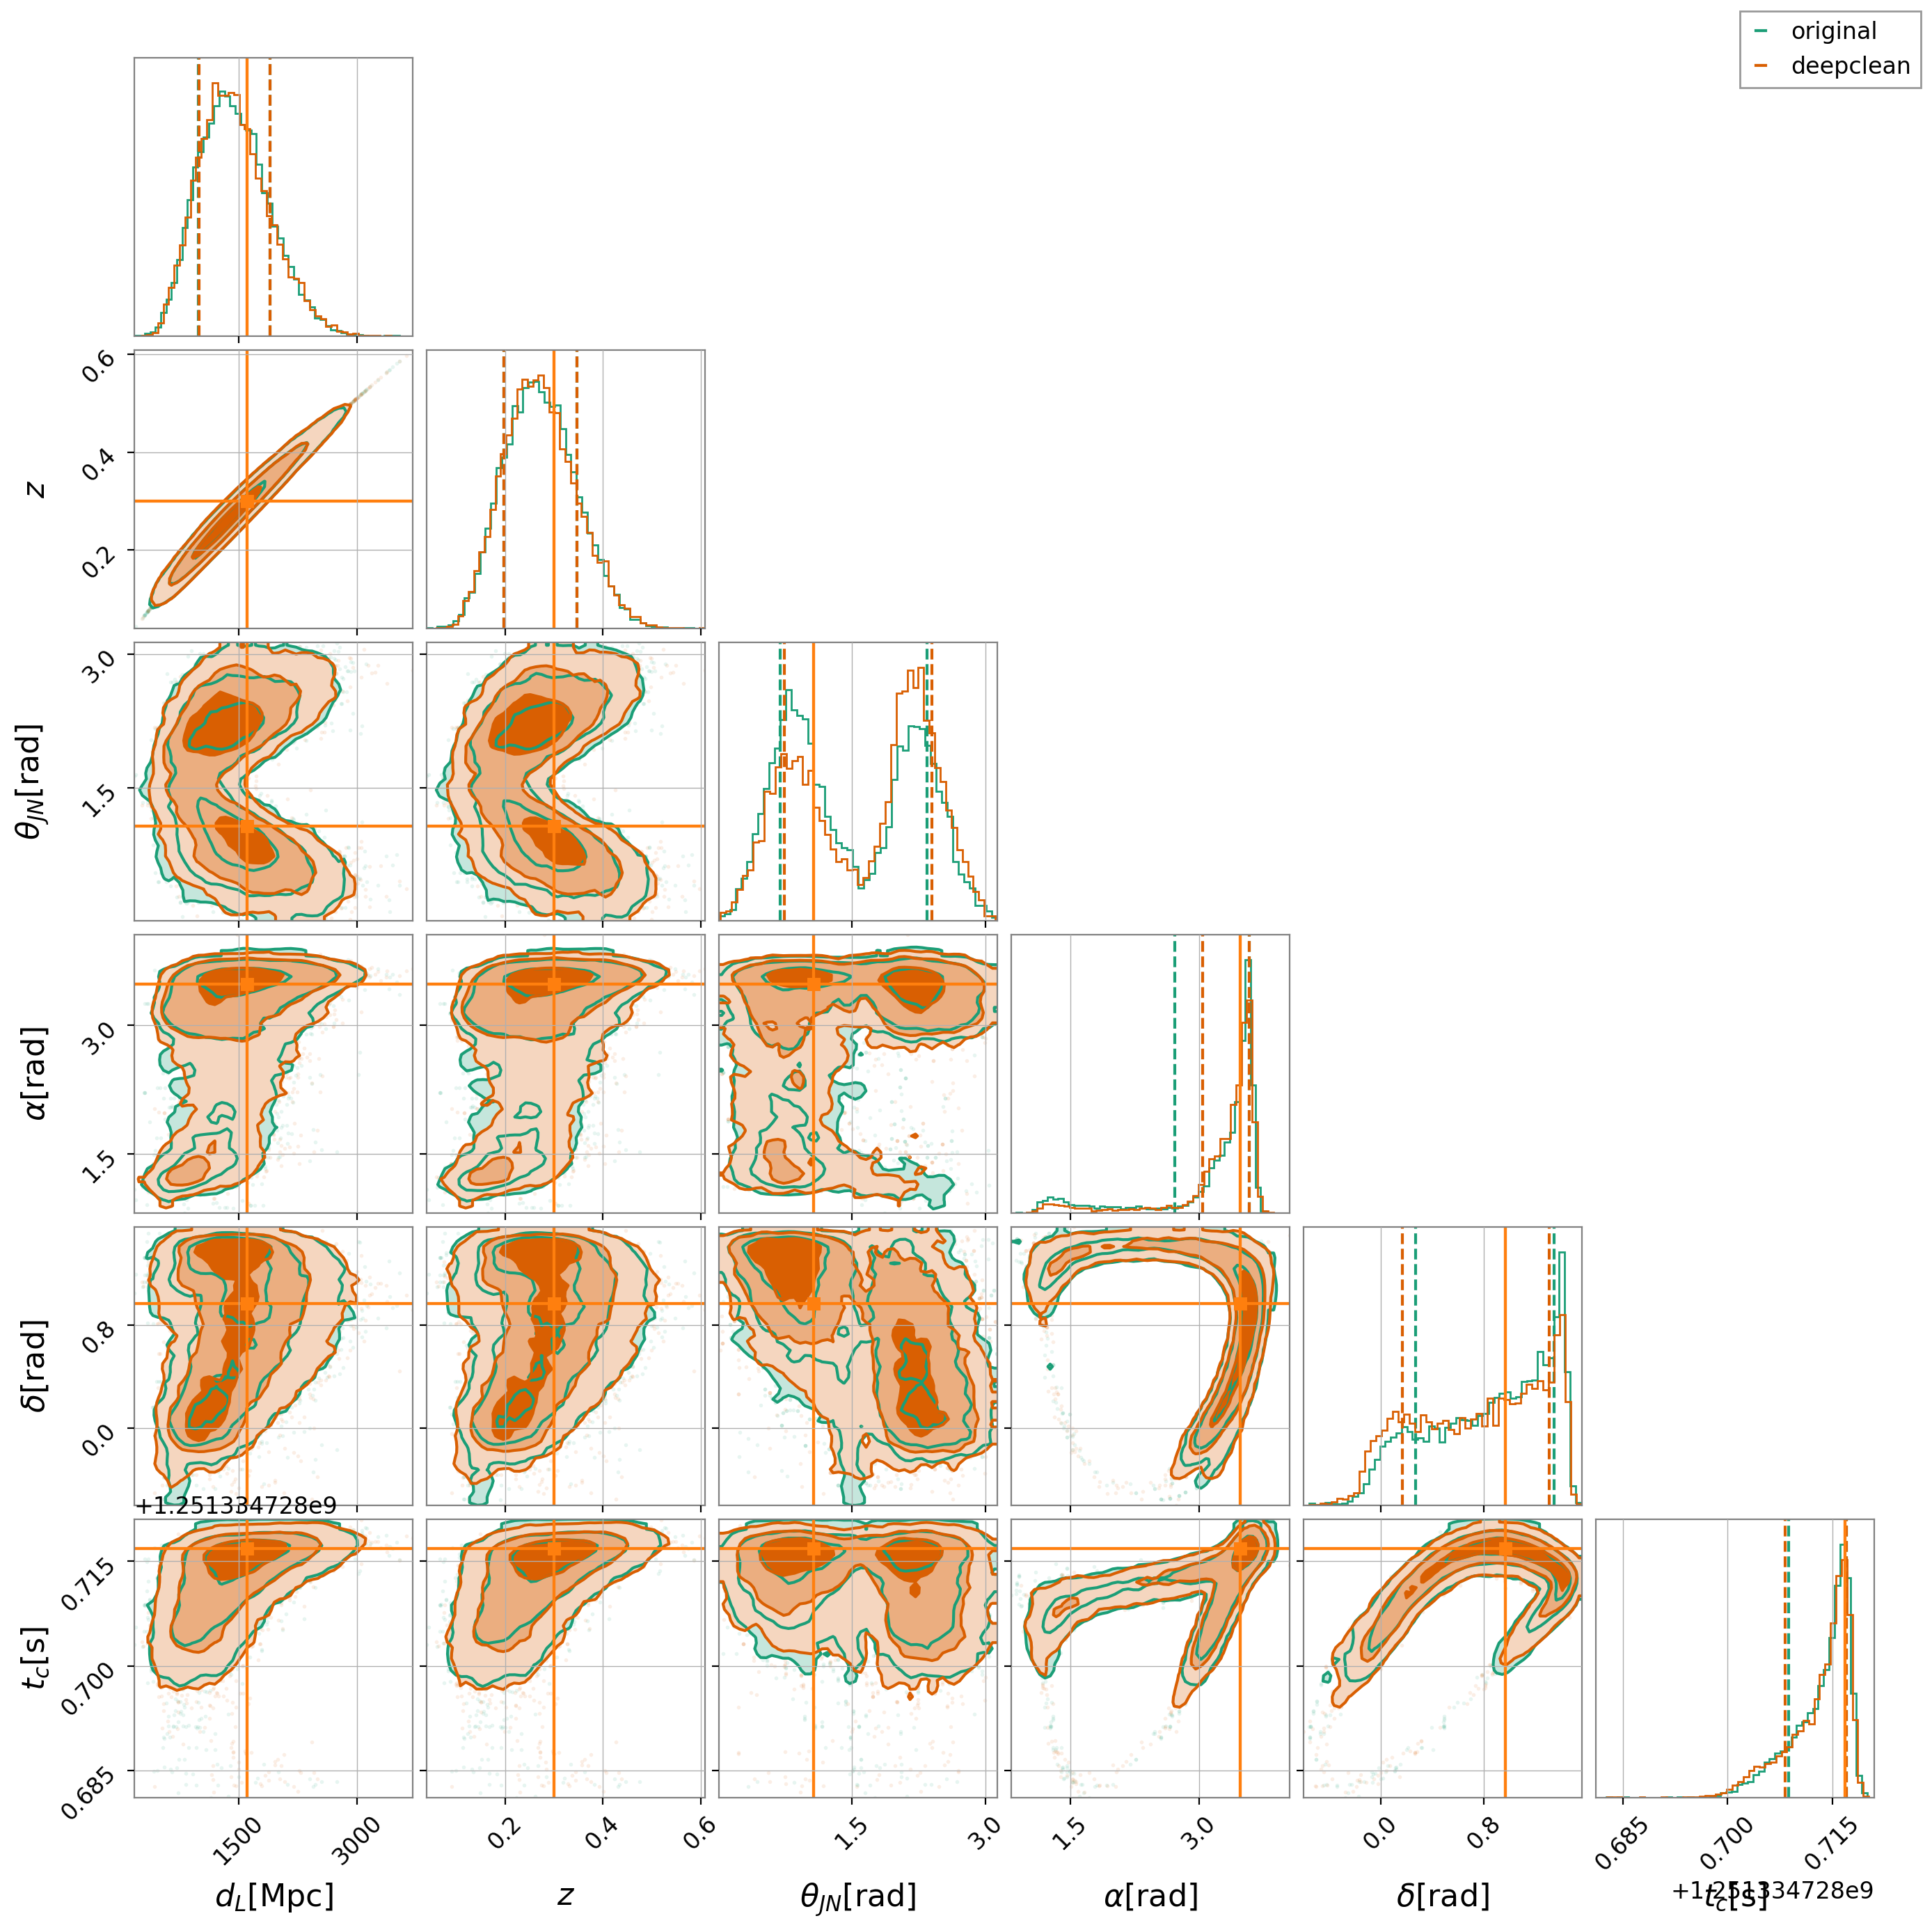

In [17]:
keys = ['luminosity_distance', 'redshift', 'theta_jn', 'ra', 'dec', 'geocent_time']
truths = [truth['luminosity_distance'],
          truth['redshift'],
          truth['theta_jn'],
          truth['ra'],
          truth['dec'],
          truth['geocent_time']]
fig = samples_dict.plot(type='corner', 
                        parameters=keys,title_kwargs=dict(fontsize=16),
                       labels=labels_of_interest,colors=cp,truths=truths,quantiles=[0.16, 0.84],plot_datapoints=True, fill_contours=True,max_n_ticks=3, hist_kwargs=dict(density=True)
                       )
plt.savefig("corner_plot_extrinsic.png")